In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor

np.random.seed(12345)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


# ========== Data ==========

In [2]:
data = pd.read_csv("dataset.csv")

In [3]:
data

,x1,x2,y
0,1.305926,1.500783,3.0
1,-1.717671,0.612735,4.0
2,-1.467331,1.843626,4.0
3,1.062857,-0.393577,1.0
4,1.378435,-0.722736,1.0
...,...,...,...
95,-0.710393,-0.851150,-0.0
96,0.291995,-1.458279,-1.0
97,-0.324825,0.045712,0.0
98,0.897479,-1.046809,-0.0


In [4]:
X_train_scaled = data[["x1", "x2"]]

In [5]:
y_train = data["y"]

# ========== Model ==========

## Setting Parameter

In [6]:
reg = MLPRegressor(
    hidden_layer_sizes=(10, 5),
    activation="relu",
    solver="sgd",
    alpha=0,
    batch_size=X_train_scaled.shape[0],
    learning_rate_init=0.01,
    max_iter=1000,
    momentum=0,
)

## Train Model

In [7]:
reg.fit(X_train_scaled, y_train)

MLPRegressor(alpha=0, batch_size=100, hidden_layer_sizes=(10, 5),
             learning_rate_init=0.01, max_iter=1000, momentum=0, solver='sgd')

## Loss curve

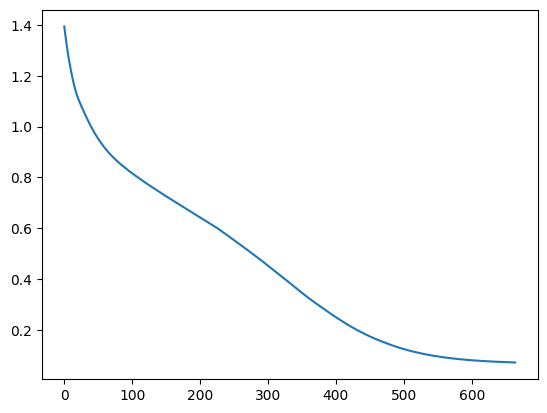

In [8]:
plt.plot(reg.loss_curve_)

## Model's Weight & Bias

In [9]:
reg.intercepts_

[array([ 0.21214382,  0.0444629 ,  0.15198816, -0.23487969, -0.03861985,
         0.03668109,  0.84618864,  0.14976769,  0.40384666, -0.44191357]),
 array([ 0.73832575, -0.04137055, -0.15155036,  0.0847531 , -0.2386591 ]),
 array([0.05764183])]

In [10]:
reg.coefs_

[array([[ 0.30346995, -1.0068764 , -0.25547002, -0.92496054,  0.50549896,
          0.66251457,  0.46760136,  0.59825986,  0.55844964,  0.28230907],
        [ 0.3084262 ,  0.50777497, -0.89272978, -0.34567219, -0.18944672,
          0.14248197,  0.42007426,  0.49925495,  0.68719585,  0.33459048]]),
 array([[-0.62784509,  0.33760103,  0.423284  , -0.37000659, -0.01919384],
        [-0.08304723,  0.02155091, -0.56778126,  1.00001568,  0.16078881],
        [ 0.45118033, -0.01229982,  0.63835305, -0.40455859, -0.35862184],
        [-0.42865911, -0.04869741,  0.02877893,  0.68127669, -0.40897924],
        [-0.0028915 , -0.42078484,  0.35327925,  0.6931259 ,  0.13849974],
        [-0.4974385 , -0.05552565, -0.22682661,  0.66006472,  0.48424825],
        [-0.08692559, -0.31287992, -0.01106156, -0.29816353, -0.51864735],
        [ 0.20376155,  0.3163176 ,  0.02068535,  0.82721014,  0.111241  ],
        [ 0.48308388, -0.09138641, -0.28755791,  0.49350466, -0.07063003],
        [-0.36956268, -0.

# ========== Prediction ==========

In [11]:
X_test_scaled = pd.read_csv("incoming_data.csv")

In [12]:
X_test_scaled

,x1,x2
0,1,1
1,2,0
2,3,1
3,3,0


In [13]:
reg.predict(X_test_scaled)

array([2.0822054 , 3.34899987, 5.90153992, 5.2522485 ])